In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#%matplotlib nbagg

In [2]:
def plot_polygon(vx, dots=False):
    """
    Returns a plot of a polygon.
    vx: list
        List of shape [[v1x, v1y], [v2x, v2y], ...] containing the
        vertices of the polygon. The vertices must be in the order 
        they appear in the polygon.
    dots: bool
        Weather we want or not to see the vertices as dots.
    """
    
    vx = list(np.copy(vx))
    vx.append(vx[0])
    vx = np.array(vx)
    plt.plot(vx.T[0], vx.T[1], color="black", linewidth=0.5)
    if dots: plt.scatter(np.array(vx).T[0], np.array(vx).T[1])
    
    
def section_point(p0, p1, r=1):
    """
    Returns the point that segments the line p0-p1 giving a ratio
    of r.
    p0: list
        Starting point [x0,y0].
    p1: list
        Ending point [x1,y1]
    r: float
        Ratio between the segments. (r=1 represents the middle
        point). Default r=1.
    """
    
    return [(p0[0] + r*p1[0]) / (1 + r), (p0[1] + r*p1[1]) / (1 + r)]
    
    
def section_points(vx, r=1):
    """
    Returns the list of points that segments each line of the
    polygon in segments of ratio r.
    vx: list
        List of shape [[v1x, v1y], [v2x, v2y], ...] containing the
        vertices of the polygon. The vertices must be in the order 
        they appear in the polygon.
    r: float
        Ratio between the segments. (r=1 represents the middle
        point). Default r=1. 
    """
    
    return [section_point(vx[i], vx[i+1], r=r) if i<len(vx)-1
            else section_point(vx[-1], vx[0], r=r)
            for i in range(len(vx))]


def vs_polygon(N, l, c=(0,0), rot=True):
    """
    Returns the vertices of a regular polygon.
    N: int
        Sides of the polygon.
    l: float
        Distance from the center of the polygon to any vertex.
    c: list/tuple
        THe center of the polygon.
    rot: bool
        If true then rotates the points of the polygon such that
        a vertex is in the top of the plot. Default True.
    """
    
    vs    = [[c[0] + l*np.cos(2*np.pi*(i/N)) ,c[1] + l*np.sin(2*np.pi*(i/N))] for i in range(N)] 
    if rot:
        theta = -(90-360/N)*(np.pi/180)
        Rot   = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)] ])
        vs_r  = np.array(vs).dot(Rot)
        return [list(v) for v in vs_r]
    
    return vs


def higher_point(vx):
    idxs = np.where( np.array(vx).T[1] == max(np.array(vx).T[1]) )[0]
    print(idxs)
    return [vx[i] for i in idxs ]


# Random Sierpinski triangle

In [5]:
#Vertices of the triangle
v0 = [[1,1], [4,7], [7,1]]
vs = []

#initial point inside the triangle
p0 = [2,2]

#Number of iterations and ratio of the line segments
N  = 300000
r  = 1

#Chaos game
for _ in range(N):
    random_v = v0[np.random.choice(range(len(v0)))]
    r_point  = section_point(p0=p0, p1=random_v, r=r)
    vs.append(r_point)
    p0 = r_point

<IPython.core.display.Javascript object>


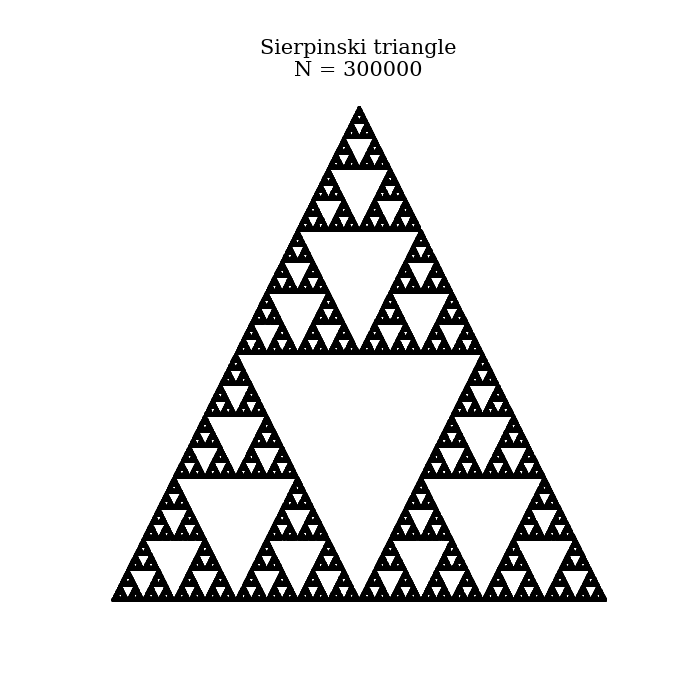

In [6]:
#Amount of points to plot each iteration
step = 10000
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(vs)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}
fig = plt.figure(figsize=(7,7))

def init_function():
    #return plt.scatter(x=np.array(v0).T[0], y=np.array(v0).T[1], s=2, c="black")
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.
def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs).T[0][0:idx], y=np.array(vs).T[1][0:idx], s=0.4, c="black")
    plt.axis("off")
    plt.title("Sierpinski triangle\nN = %.i"%idx, fontdict=font_title)
    idx+=step
    plt.show()
    
plt.axis('equal')
animation = FuncAnimation(plt.gcf(), draw, frames, interval=1, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)

# Restricted Chaos Game

It is possible to obtain fractals by using another polygons, like  squares or  pentagons. For a square, it is not possible to obtain fractals just by using a simple chaos game, it is necessary to impose restrictions on the algorithm. In the next code, there are basically two restrictions. 

1. The first one is when the next random vertex can't be the same as the previous one.

2. The second restriction is the the vertex can't neighbor the previous vertex if the last two vertex are the same (but the next vertex can be the same as the previous vertices)

In [7]:
def rcg_1(vs, p0, N, r=1):
    """
    Returns a list with random points following the rules of the
    chaos game with the restriction that the next choosen vertex
    can not be the same as the previous one.
    
    vs: list
        List of shape [[v1x, v1y], [v2x, v2y], ...] containing the
        vertices of the polygon. The vertices must be in the order 
        they appear in the polygon.
    p0: list
        Initial random point of shape [x0, y0] inside the polygon.
    N: int
        TImes the chaos game will run.
    r: float
        Ratio between the segments of the polygon. (r=1 represents
        the middle point). Default r=1. 
    """
    
    vs_s = []
    
    #Restricted chaos game
    current_v = vs[np.random.choice(range(len(vs)))]
    
    for _ in range(N):
        r_point = section_point(p0=p0, p1=current_v, r=r)
        p0      = r_point
        vs_s.append(p0)
        
        #Restriction: next vertex can't be the same as the previous one.
        aux_v = vs[np.random.choice(range(len(vs)))]
        while current_v == aux_v:
            aux_v = vs[np.random.choice(range(len(vs)))]
        current_v = aux_v
        
    return np.array(vs_s)


def rcg_2(vs, p0, N, r=1):
    """
    Returns a list with random points following the rules of the
    chaos game with the restriction that the next choosen vertex
    can not neighbor the previous one if the last two vertices are
    the same (but the next vertex can be the same as the previous
    ones). 
    
    vs: list
        List of shape [[v1x, v1y], [v2x, v2y], ...] containing the
        vertices of the polygon. The vertices must be in the order 
        they appear in the polygon.
    p0: list
        Initial random point of shape [x0, y0] inside the polygon.
    N: int
        TImes the chaos game will run.
    r: float
        Ratio between the segments of the polygon. (r=1 represents
        the middle point). Default r=1. 
    """
    
    vs_s = []
    
    #Restricted chaos game
    cv_i = [np.random.choice(range(len(vs))), np.random.choice(range(len(vs)))]
    vs_s.append(section_point(p0=p0, p1=vs[cv_i[0]], r=r))
    vs_s.append(section_point(p0=vs_s[-1], p1=vs[cv_i[1]], r=r))
    p0 = vs_s[-1]
    
    for _ in range(N-2):
        r_point = section_point(p0=p0, p1=vs[cv_i[1]], r=r)
        p0      = r_point
        vs_s.append(p0)
        
        #Restriction: next vertex can't neighbor the previous one if
        #the last two vertices are the same (but the next vertex can be
        #the same as the previous ones). 
        aux_vi  = np.random.choice(range(len(vs)))
        if cv_i[0]==cv_i[1]:
            while abs(cv_i[1]-aux_vi)==1 or abs(cv_i[1]-aux_vi)==len(vs)-1:
                aux_vi = np.random.choice(range(len(vs)))

        cv_i[0] = cv_i[1]
        cv_i[1] = aux_vi
            
    return np.array(vs_s)

### Restriction 1

In [8]:
v0_s = [[1,1], [1, 5], [5,5], [5,1]]
p0_s = [2,2]
vs_s = rcg_1(vs=v0_s, p0=p0_s, N=100000)

<IPython.core.display.Javascript object>


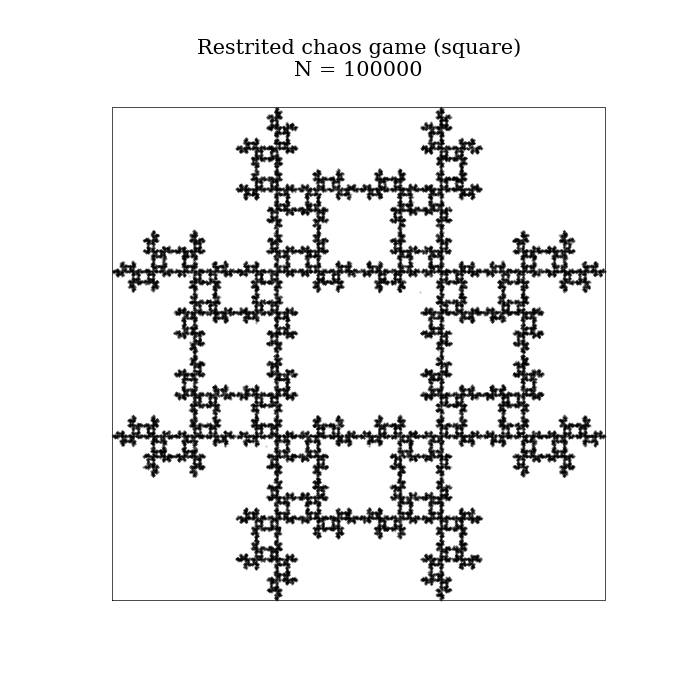

In [10]:
#Amount of points to plot each iteration
step = 10000
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(vs_s)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}

fig = plt.figure(figsize=(7,7))

def init_function():
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.
def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs_s).T[0][0:idx], y=np.array(vs_s).T[1][0:idx], s=0.15, c="black", alpha=0.3)
    plot_polygon(vx=v0_s)
    plt.axis("off")
    plt.title("Restrited chaos game (square)\nN = %.i"%idx, fontdict=font_title)
    plt.show()
    idx+=step
    
plt.axis('equal')
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)

In [11]:
v0_p = vs_polygon(N=5, l=4, rot=True)
p0_p = [2,2]
vs_p = rcg_1(vs=v0_p, p0=p0_p, N=100000)

<IPython.core.display.Javascript object>


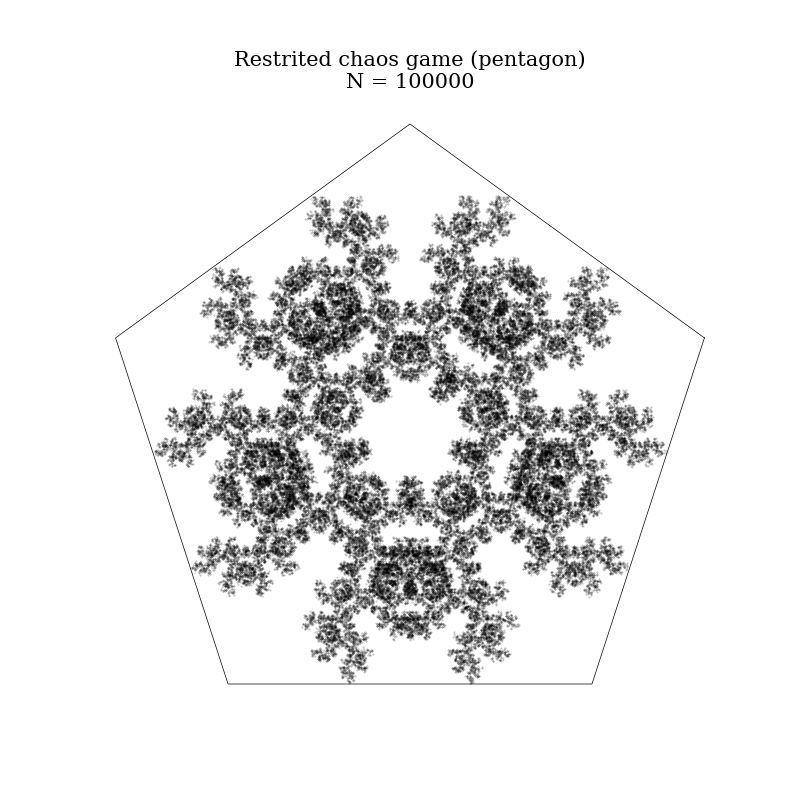

In [12]:
#Amount of points to plot each iteration
step = 10000
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(vs_p)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}
fig = plt.figure(figsize=(8,8))

def init_function():
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.
def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs_p).T[0][0:idx], y=np.array(vs_p).T[1][0:idx], s=0.15, c="black", alpha=0.3)
    plot_polygon(vx=v0_p)
    plt.axis("off")
    plt.title("Restrited chaos game (pentagon)\nN = %.i"%idx, fontdict=font_title)
    idx+=step
    plt.show()
    
plt.axis('equal')
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)

### Restriction 2

In [17]:
v0_s = [[1,1], [1, 5], [5,5], [5,1]]
p0_s = [2,2]
vs_s = rcg_2(vs=v0_s, p0=p0_s, N=1000000)

<IPython.core.display.Javascript object>


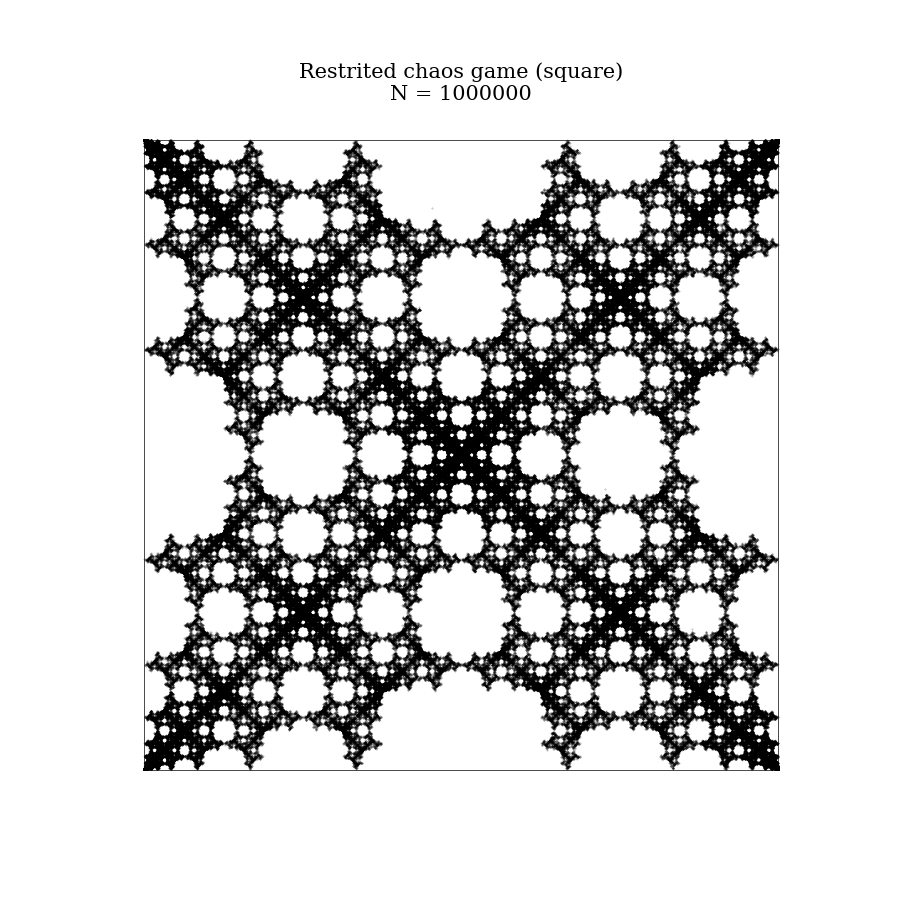

In [19]:
#Amount of points to plot each iteration
step = 20000
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(vs_s)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}

fig = plt.figure(figsize=(9,9))

def init_function():
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.
def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs_s).T[0][0:idx], y=np.array(vs_s).T[1][0:idx], s=0.15, c="black", alpha=0.3)
    plot_polygon(vx=v0_s)
    plt.axis("off")
    plt.title("Restrited chaos game (square)\nN = %.i"%idx, fontdict=font_title)
    plt.show()
    idx+=step
    
plt.axis('equal')
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)

In [96]:
v0_p = vs_polygon(N=5, l=4, rot=True)
p0_p = [2,2]
vs_p = rcg_2(vs=v0_p, p0=p0_p, N=100000)

<IPython.core.display.Javascript object>


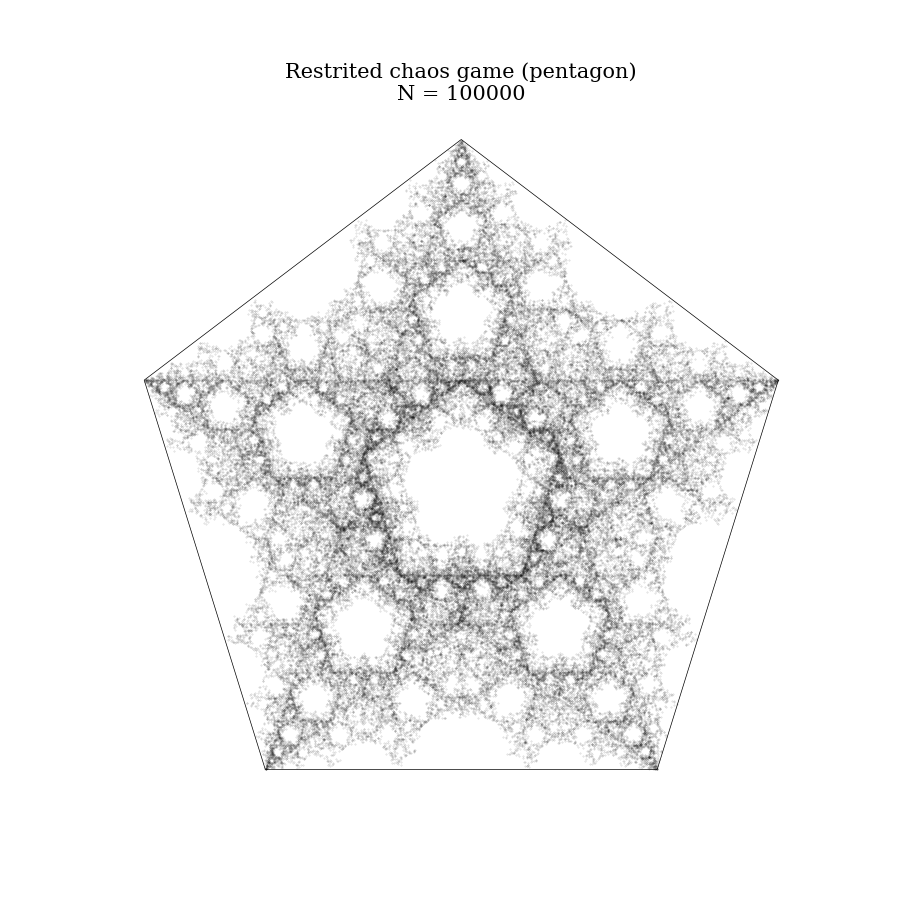

In [97]:
#Amount of points to plot each iteration
step = 10000
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(vs_p)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}
fig = plt.figure(figsize=(9,9))

def init_function():
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.
def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs_p).T[0][0:idx], y=np.array(vs_p).T[1][0:idx], s=0.1, c="black", alpha=0.2)
    plot_polygon(vx=v0_p)
    plt.axis("off")
    plt.title("Restrited chaos game (pentagon)\nN = %.i"%idx, fontdict=font_title)
    idx+=step
    plt.show()
    
plt.axis('equal')
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)